In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import warnings
from cp import WrapperOOBBinaryConformalClassifier
from plotly_utils import efficiency_curve, reliability_curve, histogram, confusion_matrix

In [2]:
# Suprimir o aviso específico
warnings.filterwarnings("ignore", category=RuntimeWarning, module="venn_abers")

In [3]:
# Gerar um conjunto de dados de classificação
X, y = make_classification(n_samples=100000, n_features=40, random_state=42)

In [4]:
# Dividir os dados em conjuntos de treinamento, calibração e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [5]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
clf = WrapperOOBBinaryConformalClassifier(rf)
clf.fit(y_train)

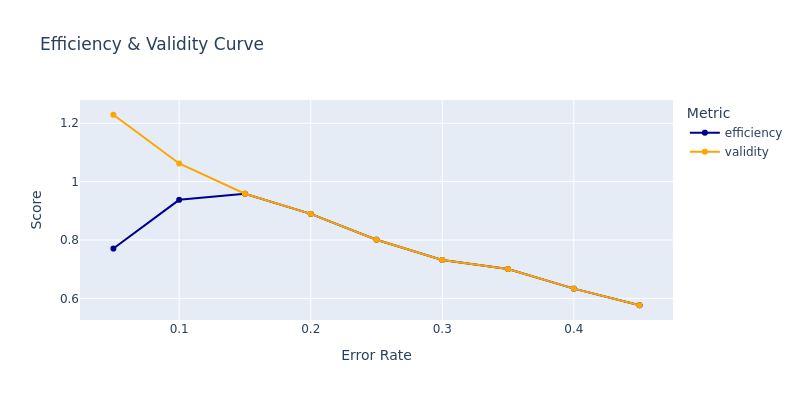

In [6]:
efficiency_curve(clf, X_test, "png")

In [7]:
clf.calibrate_alpha(X_calib)
clf.alpha

0.1

Random Forest

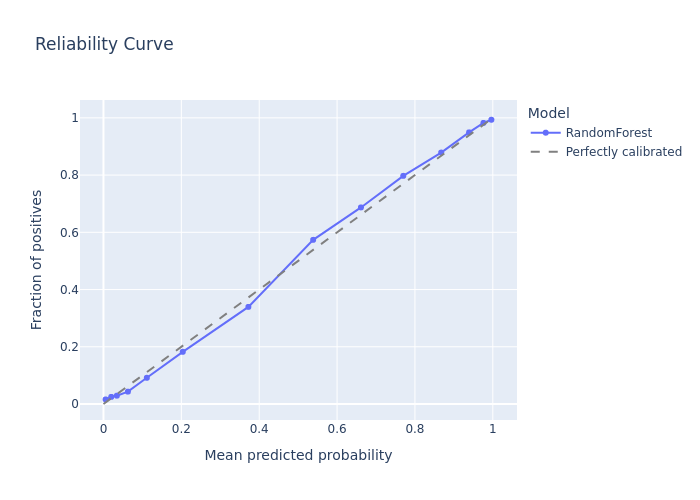

In [8]:
reliability_curve(clf.learner, X_test, y_test, 15, "png")

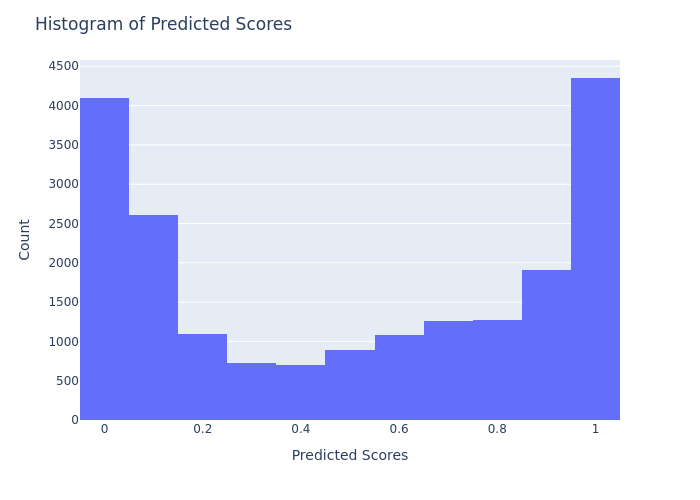

In [9]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

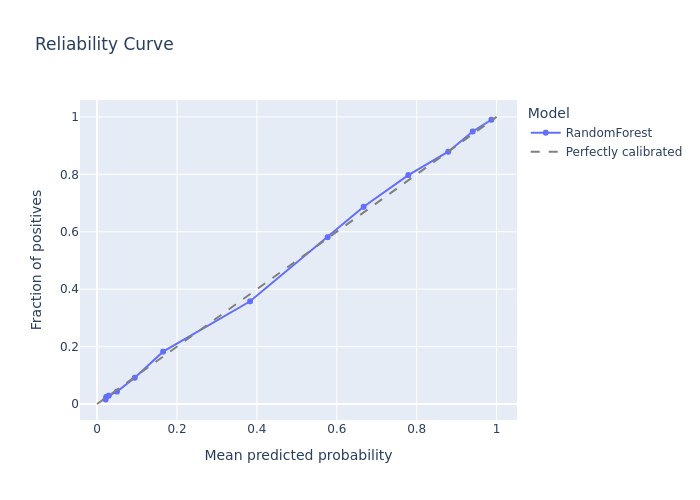

In [10]:
reliability_curve(clf, X_test, y_test, 15, "png")

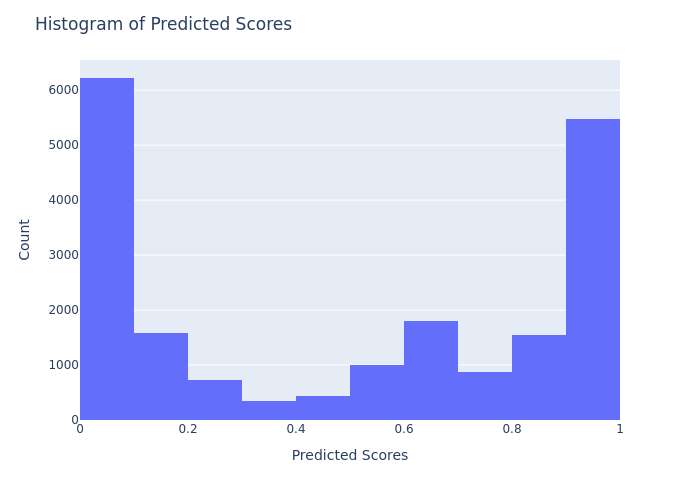

In [11]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [12]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier,ece,empirical_coverage,auc,precision,recall,alpha
0,0.771,1.229,0.0,0.047,0.298,0.091,0.006,1.0,0.945,0.876,0.863,0.05


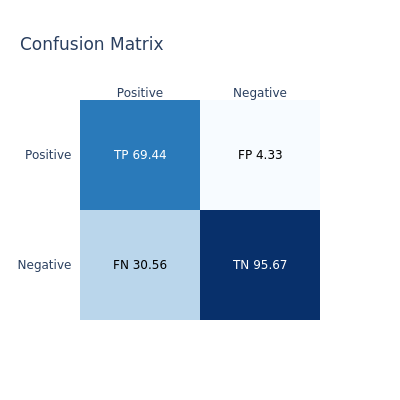

In [13]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [14]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier,ece,empirical_coverage,auc,precision,recall,alpha
0,0.938,1.062,0.0,0.098,0.298,0.091,0.006,0.913,0.945,0.876,0.863,0.1


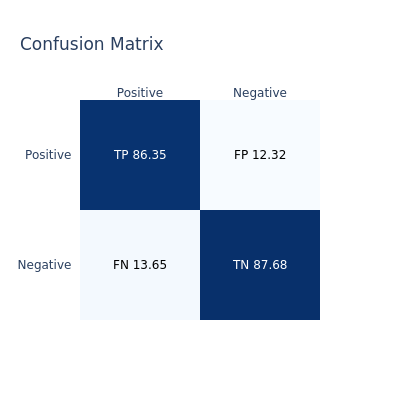

In [15]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")